# Introducción a Matplotlib


<img src='figuras/matplotlib_logo.png' width="50%"/>

[Matplotlib](https://matplotlib.org/index.html) es una librería de gráficos. En esta sección, se hace una breve introducción al módulo `matplotlib.pyplot` el cual proporciona un sistema de gráficos similar al de MATLAB.

### Anatomía de un gráfico en matplotlib

La figura es el contenedor de nivel superior en esta jerarquía. Es la ventana en la que se grafica todo. Puede tener múltiples figuras independientes y las figuras pueden contener múltiples Ejes(Axes/Subplot).

<img src='figuras/AnatomiaFigura.png' width= 50%/>

La mayoría de los gráficos se realizan sobre los Ejes(Axes). Los Ejes son efectivamente el área sobre la que graficamos los datos y cualquier marca / etiqueta / etc. asociados con ellos. Por lo general, configuramos los Ejes(Axes) con una llamada a subplot (que coloca los ejes en una cuadrícula regular), por lo que en la mayoría de los casos, Ejes(Axes) y subplot son sinónimos.

Cada Axes tiene un XAxis y un YAxis. Estos contienen las marcas, ubicaciones de las marcas, etiquetas, etc.

### Importar matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Por defecto las gráficas se mostraran en una ventana externa al notebook

In [2]:
x = np.linspace(0, 2*np.pi, 50)
y1 = np.sin(x)
y2 = np.sin(2*x)
plt.figure() # Crear una figura
plt.plot(x, y1, 'g-o', x, y2, 'b-+')
plt.legend(['sin(x)', 'sin(2x)'])

Si deseamos que las gráficas se muestren dentro del notebook, debemos ejecutar este comando especial de iPython.

In [3]:
%matplotlib inline

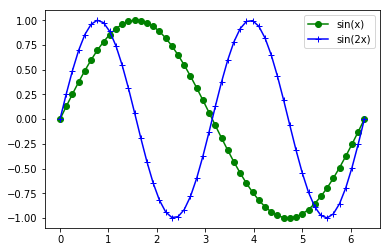

In [4]:
x = np.linspace(0, 2*np.pi, 50)
y1 = np.sin(x)
y2 = np.sin(2*x)
plt.figure() # Crear una figura
plt.plot(x, y1, 'g-o', x, y2, 'b-+')
plt.legend(['sin(x)', 'sin(2x)'])

Sin embargo la gráfica no es interactiva, si queremos una gráfica interactiva debemos cambiar el backend de matplotlib y además no ejecutar el comando `%matplotlib inline`:

In [5]:
#plt.switch_backend('nbAgg')

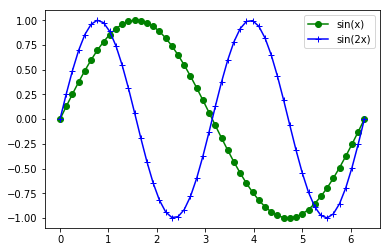

In [6]:
x = np.linspace(0, 2*np.pi, 50)
y1 = np.sin(x)
y2 = np.sin(2*x)
plt.figure() # Crear una figura
plt.plot(x, y1, 'g-o', x, y2, 'b-+')
plt.legend(['sin(x)', 'sin(2x)'])

El comando `plt.switch_backend('nbAgg')` solo funciona en Jupyter Notebooks y no en Jupyter Lab

### Figuras

Crear una Figura

In [7]:
fig = plt.figure()
plt.show()   # Solo es necesario si se va a ejecutar fuera de un notebook

Genial, una figura en blanco! No es terriblemente útil todavía.
Para cerrar una figura usar:
- close(): Cierra la figura actual
- close(num): Cierra la figura con el número `num`
- close(fig): Cierra la isntacia de figura `fig`
- close('all'): Cierra todas las figuras

In [8]:
plt.close()

Sin embargo, mientras estamos en el tema, puede controlar el tamaño de la figura a través del argumento de tamaño `figsize`, que espera una tupla de (ancho, alto) en pulgadas.
Una función de utilidad realmente útil es `figaspect()`

In [9]:
# El doble de ancho que de alto:
fig = plt.figure(figsize=plt.figaspect(0.5))
plt.show()

### Axes (Ejes)

Todo el graficado se hace con respecto a un Axes. Un Axes se compone de objetos Axis (Eje) y muchas otras cosas. Un objeto Axes debe pertenecer a una figura (y solo una figura). La mayoría de los comandos que emitirá serán con respecto a este objeto Axes.

Normalmente, configurará una figura y luego agregará un eje a ella.

Puede usar `fig.add_axes`, pero en la mayoría de los casos, encontrará que agregar un `subplot` se ajustará perfectamente a sus necesidades. (De nuevo, un `subplot` es solo un eje en un sistema de cuadrícula).

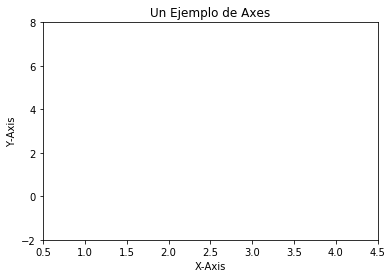

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111) # Explicaremos el "111" más adelante. Basicamente esta definiendo 1 fila y 1 columna.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='Un Ejemplo de Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

### Graficar

La mayoría de los gráficos ocurren en un Ejes. Por lo tanto, si graficas algo en un eje, entonces usarás uno de sus métodos.

Hablaremos sobre los diferentes métodos de graficado en mayor profundidad en la siguiente sección. Por ahora, centrémonos en dos métodos: `plot` (gráficos de línea) y `scatter` (gráficos de puntos).

Ejemplo:

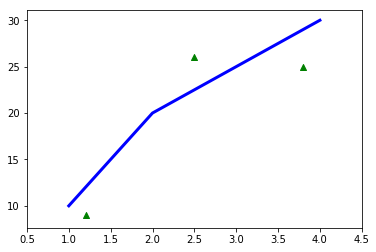

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='blue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='green', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

### Graficado explicito (Métodos de Axes) vs. implicito (pyplot)

Curiosamente, casi todos los métodos de un objeto Axes existen como una función en el módulo pyplot (y viceversa). Por ejemplo, al llamar a `plt.xlim (1, 10)`, pyplot llama a `ax.set_xlim (1, 10)` en el Axes "actual". Aquí hay una versión equivalente del ejemplo anterior usando solo pyplot.

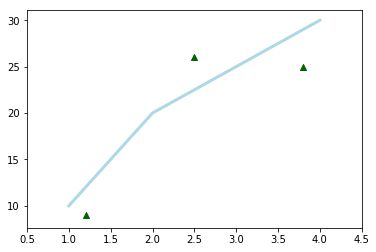

In [12]:
plt.figure()
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()


Si bien para los gráficos simples, con código cortos el enfoque implícito pyplot es mas conciso, al hacer gráficos más complicados o trabajar con códigos más grandes, es preferible referirse al Axes o la figura explícitamente.

La ventaja de mantener con claridad con que Axes estamos trabajamos se hará más obvia cuando comencemos a tener múltiples Axes en una figura.

Además, segun el Zen de Python:

"*Lo explicito es mejor que lo implicito*"

### Multiples Axes

Hemos mencionado anteriormente que una figura puede tener más de un Axes en ella. Si desea que sus Axes estén en un sistema de cuadrícula regular, entonces es más fácil usar `plt.subplots(...)` para crear una figura y agregarle los Axes automáticamente.

La llamada a `plt.subplots(nrows=2, ncols=2)` crea una nueva figura y le agrega 4 subplots. El objeto `axes` que se devolvió es una matriz de objetos numpy de 2D. Cada elemento en la matriz es una de los subplots.

Por lo tanto, cuando queremos trabajar con uno de estos `axes`, podemos indexar el conjunto de `axes` y usar los métodos de ese elemento.

Por ejemplo:

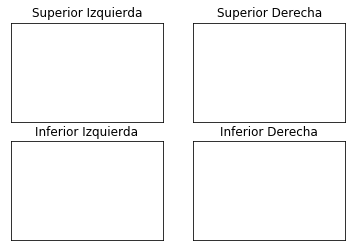

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Superior Izquierda')
axes[0,1].set(title='Superior Derecha')
axes[1,0].set(title='Inferior Izquierda')
axes[1,1].set(title='Inferior Derecha')

# Para iterar sobre todos los elementos de un arreglo multidimensional, usar el atributo `flat`
for ax in axes.flat:
    # Remove todas las marcas del eje x y del eje y
    ax.set(xticks=[], yticks=[])
    
plt.show()

### Gráficos de línea

La función mas importante de `matplotlib` es `plot`, la cual permite realizar gráficos de linea de datos en 2D.

Por ejemplo:

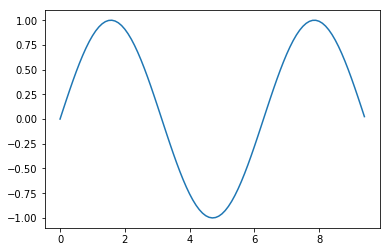

In [14]:
# Calcular las coordenadas x e y para puntos en una curva senoidal
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)
# Crear una figura
plt.figure()
# Graficar los puntos usando matplotlib
plt.plot(x, y)

Con solo un poco de trabajo extra, podemos trazar varias líneas a la vez y agregar etiquetas de título, leyenda y a los ejes:

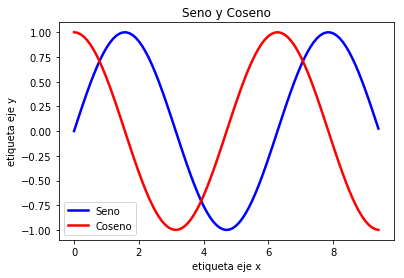

In [15]:
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure()

# Graficar los puntos usando matplotlib
plt.plot(x, y_sin, color="blue", linewidth=2.5, linestyle="-")
plt.plot(x, y_cos, color="red",  linewidth=2.5, linestyle="-")
plt.xlabel('etiqueta eje x')
plt.ylabel('etiqueta eje y')
plt.title('Seno y Coseno')
plt.legend(['Seno', 'Coseno'])

### Gráficos de puntos

La función `scatter` de matplotlib nos permite realizar gráficos de puntos de datos en 2D

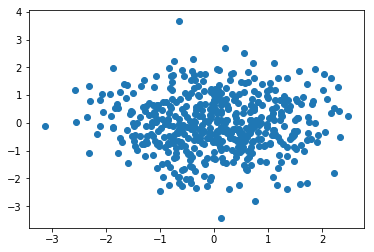

In [16]:
plt.figure()
# Graficar puntos
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y);

Text(0.5,1,'Puntos Aleatorios')

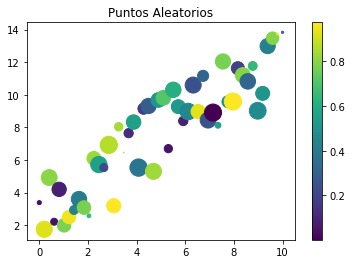

In [39]:
N = 50 # número de puntos
x = np.linspace(0, 10, N)
e = np.random.rand(N)*5.0 # ruido
y1 = x + e

areas = np.random.rand(N)*300

colores = np.random.rand(N)

plt.scatter(x, y1, s=areas, c=colores)

plt.colorbar()
plt.title("Puntos Aleatorios")

### Colores

Esta es, quizás, la parte más importante del vocabulario de Matplotlib. Dado que Matplotlib es una biblioteca de graficado, los colores están asociados con todo lo que se grafica en sus figuras. Matplotlib admite un [lenguaje muy sólido](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) para especificar colores que deberían ser familiares para una gran variedad de usuarios.

#### Nombres de colores
Primero, los colores se pueden dar como cadenas. Para colores muy básicos, incluso se puede usar una sola letra:

- b: azul
- g: verde
- r: rojo
- c: cian
- m: magenta
- y: amarillo
- k: negro
- w: blanco

Otros nombres de colores que se permiten son los nombres de colores HTML / CSS como "burlywood" y "chartreuse". Vea la [lista completa](https://www.w3schools.com/colors/colors_names.asp) de los 147 nombres de colores.

#### Valores hexadecimales
Los colores también se pueden especificar suministrando una cadena hexadecimal de HTML/CSS, como `'#0000FF'` para azul.

#### 256 tonos de gris
Se puede dar un nivel de gris en lugar de un color al pasar una representación de cadena de un número entre 0 y 1, inclusive. `'0.0'` es negro, mientras que` '1.0'` es blanco. `'0.75'` sería un tono claro de gris.

Ejemplo:

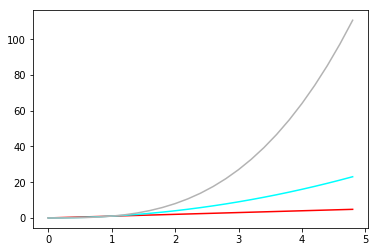

In [17]:
plt.figure()

t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, 'r', t, t**2, 'cyan', t, t**3, '0.7')
plt.show()


En caso de no especificar los colores, matplotlib utiliza unos colores por defecto:

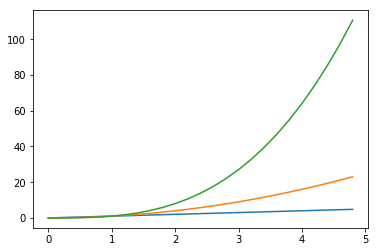

In [18]:
plt.figure()
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, t, t**2, t, t**3)
plt.show()

### Marcadores
[Marcadores](http://matplotlib.org/api/markers_api.html) se usan regularmente en gráficos [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) y [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter), pero también aparecen en otros lugares. Hay un amplio conjunto de marcadores disponibles, e incluso se pueden especificar marcadores personalizados.

marcador   |  descripción  ||marcador  |  descripción  ||marcador  |  descripción  ||marcador  |  descripción  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  punto        ||"+"       |  suma         ||","       |  pixel        ||"x"       |  cruz
"o"        |  círculo      ||"D"       |  diamante     ||"d"       |  diamante_fino||          |
"8"        |  octágono     ||"s"       |  cuadrado     ||"p"       |  pentágono    ||"\*"      |  estrella
"&#124;"   |  barra vertical||"\_"     |  barra horizontal||"h"    |  hexágono1    ||"H"       |  hexágono2
0          |  tick izquierda ||4       |  caret izquierda ||"<"    | triángulo izquierda ||"3" |  tri izquierda
1          |  tick derecha ||5         |  caret derecha   ||">"    | triángulo derecha||"4"    |  tri derecha
2          |  tick arriba  ||6         |  caret arriba    ||"^"    | triángulo arriba   ||"2"  |  tri arriba
3          |  tick abajo   ||7         |  caret abajo     ||"v"    | triángulo abajo ||"1"     |  tri abajo
"None"     |  nada         ||`None`    |  valor por defecto||" "   |  nada         ||""        |  nada

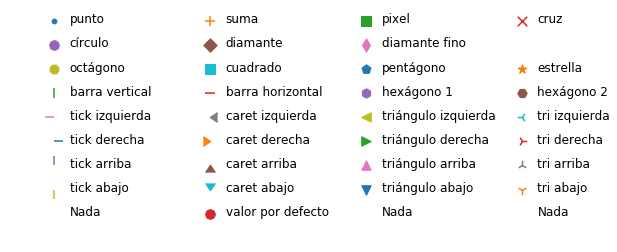

In [19]:
xs, ys = np.mgrid[:4, 9:0:-1]
marcadores = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripcion = ["punto", "suma", "pixel", "cruz", "círculo", "diamante", "diamante fino", "",
             "octágono", "cuadrado", "pentágono", "estrella", "barra vertical", "barra horizontal", "hexágono 1", "hexágono 2",
             "tick izquierda", "caret izquierda", "triángulo izquierda", "tri izquierda", "tick derecha", "caret derecha", "triángulo derecha", "tri derecha",
             "tick arriba", "caret arriba", "triángulo arriba", "tri arriba", "tick abajo", "caret abajo", "triángulo abajo", "tri abajo",
             "Nada", "valor por defecto", "Nada", "Nada"]
fig, ax = plt.subplots(1, 1, figsize=(9.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, marcadores, descripcion):
    ax.scatter(x, y, marker=m, s=90)
    ax.text(x + 0.1, y - 0.1, d, size=12)
ax.set_axis_off()
plt.show()

### Estilo de líneas

Los estilos de línea son tan comunes como los colores. Hay algunos estilos de línea predefinidos disponibles para su uso. Tenga en cuenta que hay algunas técnicas avanzadas para especificar algunos estilos de línea personalizados. [Aquí](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) es un ejemplo de un patrón de guión personalizado.

estilo línea        | descripción
------------------- | ------------------------------
'-'                 | sólida
'-'                 | discontinua
'-.'                | guión punto
':'                 | punteada
'Ninguno'           | no dibujar nada
''                  | no dibujar nada
''                  | no dibujar nada

Además, no mezcle ".-" (línea con marcadores de puntos) y "-." (línea de puntos y rayas) cuando se usa la función `` plot``!

#### Ejemplo 1: Hacer un gráfico con rayas rojas, cuadrados azules y triángulos verdes

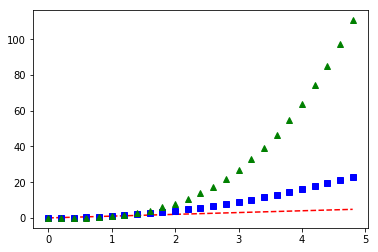

In [20]:
plt.figure()

t = np.arange(0., 5., 0.2)
# rayas rojas, cuadrados azules y triángulos verdes
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

#### Ejemplo 2: Hacer un gráfico que tenga una línea roja punteada, con marcadores de diamantes amarillos que tengan un borde verde

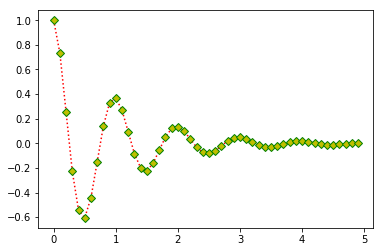

In [22]:
plt.figure()

t = np.arange(0.0, 5.0, 0.1)
a = np.exp(-t) * np.cos(2*np.pi*t)
plt.plot(t, a, 'r:D', markerfacecolor='y', markeredgecolor='g')
plt.show()


### Gráficos de barras

Los gráficos de barras son uno de los tipos de gráficos más comunes. El método `ax.bar(...)` de Matplotlib también puede trazar rectángulos generales, pero el valor predeterminado está optimizado para una secuencia simple de valores x, y, donde los rectángulos tienen un ancho constante. También hay `ax.barh(...)` (para horizontal), que hace una suposición de altura constante en lugar de una suposición de ancho constante.

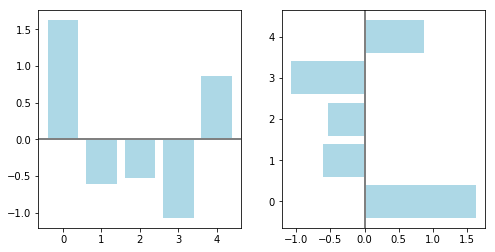

In [23]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

barras_verticales = axes[0].bar(x, y, color='lightblue', align='center')
barras_horizontales = axes[1].barh(x, y, color='lightblue', align='center')

# las funciones axhline & axvline grafican una línea en todo el camino a través de los ejes
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

Podemos fijar el color de las barras de acuerdo a alguna condición. Por ejemplo si la barra es negativa hacer el color salmon

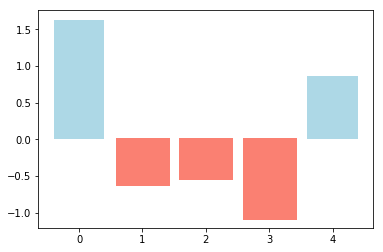

In [24]:
fig, ax = plt.subplots()
barras_verticales = ax.bar(x, y, color='lightblue', align='center')

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for barra, altura in zip(barras_verticales, y):
    if altura < 0:
        barra.set(color='salmon', linewidth=3)

plt.show()

Ejemplo de gráfico de barras horizontales:

Text(0.5,1,'Ventas en Europa')

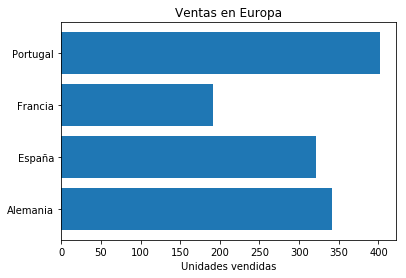

In [25]:
plt.figure()
paises = ("Alemania", "España", "Francia", "Portugal")
posicion_y = np.arange(len(paises))
unidades = (342, 321, 192, 402)
plt.barh(posicion_y, unidades, align = "center")
plt.yticks(posicion_y, paises)
plt.xlabel('Unidades vendidas')
plt.title("Ventas en Europa")

Gráfico con miltiples barras verticales:

([<matplotlib.axis.XTick at 0x11244d5c0>,
 <a list of 4 Text xticklabel objects>)

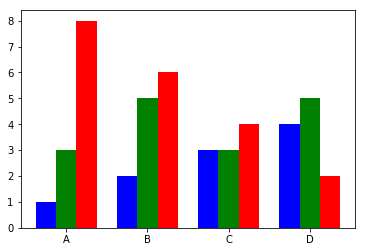

In [26]:
plt.figure()

datos = [[1, 2, 3, 4], [3, 5, 3, 5], [8, 6, 4, 2]]
X = np.arange(4)
plt.bar(X + 0.00, datos[0], color = "b", width = 0.25)
plt.bar(X + 0.25, datos[1], color = "g", width = 0.25)
plt.bar(X + 0.50, datos[2], color = "r", width = 0.25)
plt.xticks(X+0.25, ["A","B","C","D"])

### Histogramas

(array([    2.,    12.,    47.,   104.,   243.,   456.,   778.,  1153.,
         1344.,  1567.,  1456.,  1138.,   778.,   469.,   280.,   108.,
           41.,    14.,     7.,     3.]),
 array([-3.6564401 , -3.27227564, -2.88811118, -2.50394673, -2.11978227,
        -1.73561781, -1.35145336, -0.9672889 , -0.58312444, -0.19895998,
         0.18520447,  0.56936893,  0.95353339,  1.33769784,  1.7218623 ,
         2.10602676,  2.49019122,  2.87435567,  3.25852013,  3.64268459,
         4.02684904]),
 <a list of 20 Patch objects>)

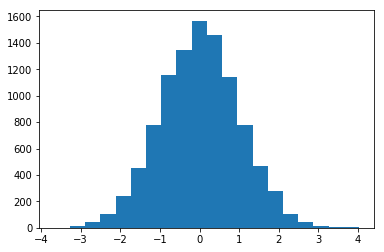

In [27]:
plt.figure()

x = np.random.randn(10000)  # Definimos un vector de números aleatorios de una distribución normal
plt.hist(x, bins = 20)  # Dibuja un histograma dividiendo el vector x en 20 intervalos

### Gráficos de Torta

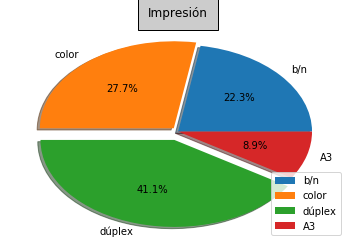

In [28]:
plt.figure()
impr = ["b/n", "color", "dúplex", "A3"]
vol = [25, 31, 46, 10]
expl =(0, 0.05, 0.1, 0)
plt.pie(vol, explode=expl, labels=impr, autopct='%1.1f%%', shadow=True)
plt.title("Impresión", bbox={"facecolor":"0.8", "pad":10})
plt.legend(loc='lower right')

### Gráficos de Área (Apilados)

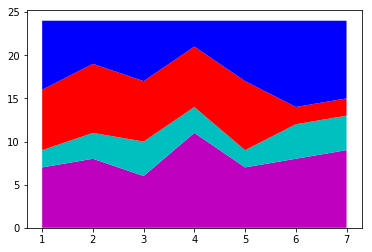

In [29]:
plt.figure()

dias = [1,2,3,4,5,6,7]

dormir =    [7, 8, 6, 11, 7, 8, 9]
comer =     [2, 3, 4, 3, 2, 4, 4]
trabajar =  [7, 8, 7, 7, 8, 2, 2]
jugar =     [8, 5, 7, 3, 7, 10, 9]

plt.stackplot(dias, dormir, comer, trabajar, jugar, colors=['m', 'c', 'r', 'b', 'g', 'c', 'y'])

plt.show()

### Gráficos de Imágenes

[[ 1.          0.03856741 -0.16365416  0.01164042]
 [ 0.03856741  1.          0.12463615  0.02401515]
 [-0.16365416  0.12463615  1.         -0.02611911]
 [ 0.01164042  0.02401515 -0.02611911  1.        ]]


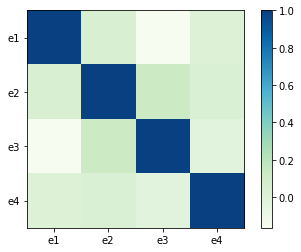

In [48]:
# Crear unos datos
e1 = np.random.rand(100)
e2 = np.random.rand(100)*2
e3 = np.random.rand(100)*10
e4 = np.random.rand(100)*100
matrix_correlacion = np.corrcoef([e1, e2, e3, e4])
print(matrix_correlacion)

# Graficar la matriz de correlación como una imagen
plt.imshow(matrix_correlacion, interpolation='none', cmap='GnBu')
plt.colorbar()
var = ['e1', 'e2', 'e3', 'e4']
posicion = np.arange(len(var))
plt.yticks(posicion, var)
plt.xticks(posicion, var)
plt.show()

### Referencias:

- [Ejemplos de gráficos en Matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html)
- [Tutorial de Matplotlib de SciPy 2017](https://github.com/WeatherGod/AnatomyOfMatplotlib)
- [Pyplot Tutorial de Matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)